In [1]:
#Call most important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
#Import the data from the local machine.
df = pd.read_csv('cancerdata.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [4]:
#Checking data shape
df.shape

(569, 32)

In [5]:
#Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Droping "id" column as it is unique.
df = df.drop(["id"], axis=1)

In [7]:
#Re-ordering the columns.
df = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
         'fractal_dimension_mean', 'radius_se', 'texture_se','perimeter_se', 'area_se',
         'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
         'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
         'smoothness_worst','compactness_wors','concavity_worst','concave points_worst',
         'symmetry_worst','fractal_dimension_worst','diagnosis']]

In [8]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594,M
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397,M
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802,M
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210,M
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,0.505060,0.566071,1.972287,158.70,0.005673,0.009436,0.05198,0.02454,0.020836,0.005456,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780,M
565,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,0.522778,1.110313,4.025630,99.04,0.009236,0.027082,0.03950,0.01678,0.012430,-0.000019,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449,M
566,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,0.628936,1.107104,1.943147,48.55,0.008076,-0.002990,0.04730,0.01557,0.014103,0.007739,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450,M
567,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,0.338542,0.822432,2.288387,86.22,0.007873,0.029954,0.07117,0.01664,0.009220,0.006787,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609,M


In [9]:
#Dealing with missing values
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

As we can see that there is no missing value in the data.

In [10]:
#Encoding the target variable as it is in string format.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.diagnosis=le.fit_transform(df.diagnosis.values)

In [12]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594,1
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397,1
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802,1
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210,1
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,0.505060,0.566071,1.972287,158.70,0.005673,0.009436,0.05198,0.02454,0.020836,0.005456,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780,1
565,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,0.522778,1.110313,4.025630,99.04,0.009236,0.027082,0.03950,0.01678,0.012430,-0.000019,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449,1
566,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,0.628936,1.107104,1.943147,48.55,0.008076,-0.002990,0.04730,0.01557,0.014103,0.007739,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450,1
567,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,0.338542,0.822432,2.288387,86.22,0.007873,0.029954,0.07117,0.01664,0.009220,0.006787,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609,1


In [13]:
#Checking the correlation of each and every variables.
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.070425,-0.035228,-0.032708,0.024861,0.010012,-0.074375,-0.070011,0.046623,0.033805,0.012795,0.030862,0.009318,-0.046940,-0.042970,0.009876,-0.074536,-0.106635,-0.002874,0.005511,-0.037750,-0.054781,-0.035869,-0.041812,0.011173,-0.063024,-0.049089,-0.000033,0.013231,-0.019669,-0.005960
texture_mean,0.070425,1.000000,0.006155,0.008631,0.021654,0.047145,0.006832,0.077424,-0.023344,-0.003806,-0.061184,0.005729,0.056161,0.042223,-0.018967,0.024364,0.059769,0.041280,-0.032921,0.003319,0.008352,0.048012,0.010269,0.012803,0.033872,0.053946,0.044502,-0.049535,0.056662,-0.013935,0.008173
perimeter_mean,-0.035228,0.006155,1.000000,0.986507,-0.043853,0.000807,0.049568,-0.071642,0.002254,0.040042,0.047773,0.028094,0.015025,0.744983,-0.029894,-0.025082,0.228082,0.407217,0.005295,-0.032627,0.969476,0.303038,0.970387,0.941550,0.150549,-0.020032,0.563879,-0.039836,0.189115,-0.012852,0.742636
area_mean,-0.032708,0.008631,0.986507,1.000000,-0.047062,0.002561,0.040642,-0.060022,-0.001786,0.038391,0.057057,0.017864,0.014144,0.800086,-0.030848,-0.032259,0.207660,0.372320,0.001013,-0.035046,0.962746,0.287489,0.959120,0.959213,0.123523,-0.013764,0.512606,-0.036284,0.143570,-0.029543,0.708984
smoothness_mean,0.024861,0.021654,-0.043853,-0.047062,1.000000,-0.041543,-0.002777,0.000010,0.032645,0.003785,0.047041,0.008970,-0.015423,-0.025343,0.094440,0.001379,0.009347,0.003734,0.073480,0.008877,-0.044234,-0.073102,-0.036288,-0.048910,-0.021490,0.044842,0.016772,0.065017,-0.038502,-0.029748,-0.014561
compactness_mean,0.010012,0.047145,0.000807,0.002561,-0.041543,1.000000,-0.002953,0.019169,-0.058799,0.005069,0.067240,0.016067,0.036341,0.033558,0.054655,-0.001585,0.013099,0.033779,0.018448,-0.022843,0.003426,0.048005,0.003217,0.009143,0.040886,-0.035002,-0.015305,0.052424,0.000749,-0.001925,-0.005790
concavity_mean,-0.074375,0.006832,0.049568,0.040642,-0.002777,-0.002953,1.000000,0.042943,0.039856,-0.037378,-0.004993,-0.009966,-0.035997,0.027478,-0.041651,0.013409,0.076777,0.075849,-0.012510,0.002185,0.019058,-0.052707,0.028040,0.009482,0.039363,-0.021552,0.077975,-0.074706,0.037577,-0.000306,0.031461
concave points_mean,-0.070011,0.077424,-0.071642,-0.060022,0.000010,0.019169,0.042943,1.000000,-0.015877,-0.028798,-0.024701,-0.009831,0.085809,-0.012913,-0.009404,0.024362,-0.004215,-0.019548,-0.008168,0.042237,-0.062171,-0.026923,-0.065773,-0.047116,-0.002481,-0.007732,-0.041824,0.011258,-0.046071,0.063022,-0.057175
symmetry_mean,0.046623,-0.023344,0.002254,-0.001786,0.032645,-0.058799,0.039856,-0.015877,1.000000,-0.087283,0.036787,-0.029940,0.001912,0.007585,0.023663,-0.072867,-0.032407,-0.002997,0.044450,0.046550,-0.003456,-0.040158,-0.004209,-0.005463,0.013762,-0.030260,-0.011905,0.002119,0.033243,0.029987,0.016472
fractal_dimension_mean,0.033805,-0.003806,0.040042,0.038391,0.003785,0.005069,-0.037378,-0.028798,-0.087283,1.000000,0.012801,0.045559,0.036674,-0.001993,0.016563,-0.004311,0.013470,0.030955,0.034683,0.021137,0.041064,0.001621,0.045751,0.037970,0.058127,-0.012873,0.043386,-0.010030,0.026701,0.034839,0.002882


In [14]:
#Separate data.
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
#Spliting the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,13.870706,19.541270,64.41,310.8,0.095066,0.143390,-0.064287,0.015055,0.150048,0.063041,0.357954,1.419995,0.436179,16.85,0.006034,0.022777,0.01690,0.008043,0.016107,0.005404,11.16,26.84,71.98,384.0,0.1402,0.228874,0.1055,0.022767,0.2894,0.081966
427,10.457178,17.641199,68.79,359.9,0.103704,0.043663,0.166668,0.064963,0.195278,0.060413,0.140578,1.545863,3.249990,20.20,0.005273,0.025063,0.02991,0.010450,0.012379,0.007106,12.76,32.04,83.69,489.5,0.1303,0.238419,0.1927,0.093209,0.2965,0.065336
406,17.393131,15.805025,104.30,800.0,0.108856,0.065614,0.163425,0.078098,0.179416,0.056693,0.861902,1.335521,-0.624781,21.83,0.008709,0.000859,0.01831,0.008747,0.025255,0.004621,17.71,19.58,115.90,947.9,0.1206,-0.146164,0.2310,0.239163,0.2778,0.063857
96,16.041650,18.877867,77.79,451.1,0.128182,0.010408,0.157710,-0.007168,0.201321,0.062841,0.286917,1.482751,3.478613,24.44,0.006570,0.016999,0.01131,0.015190,0.016640,0.005752,12.83,20.92,82.14,495.2,0.1140,0.564675,0.0498,0.212252,0.2227,0.117961
490,10.621675,25.259429,78.18,466.5,0.108655,0.020065,0.142446,0.084265,0.168305,0.058484,0.723566,1.745553,4.201851,18.04,0.007030,0.000845,0.00941,0.004551,0.010512,-0.001472,14.17,31.99,92.74,622.9,0.1256,0.297597,0.1230,0.069052,0.3100,0.063438


In [17]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [19]:
#Selecting the number of neighbors.
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sc,y_train)
    pred_new = knn.predict(x_test_sc)
    error.append(np.mean(pred_new !=y_test))

Text(0, 0.5, 'error')

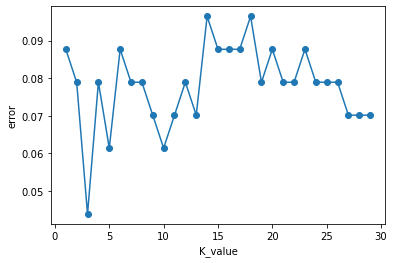

In [20]:
plt.plot(range(1,30), error, marker='o')
plt.xlabel('K_value')
plt.ylabel('error')

In [21]:
#Selecting 5 as n_neighbors which will fit for the model and not taking 3 just to avoid overfitting.
knn = KNeighborsClassifier(n_neighbors = 5) 

In [22]:
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [23]:
pred = knn.predict((x_test_sc))

In [24]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,pred)

0.9385964912280702

As we see 94% of accuracy for the model after selecting 5 as n_neighbors.

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



precision (+ve) = TP/TP+FP = 66/(66+6) = 0.92 precision (-ve) = TN/TN+FN = 41/(41+1) = 0.98

recall (+ve) = TP/TP+FN = 66/(66+1) = 0.99 recall (-ve) = TN/TN+FP = 41/(41+6) = 0.87

f1_score = 2(Prec*Recall)/(Prec+Recall) f1_score = 2(0.980.94)/(0.98+0.94) = 2(0.9212/1.92) = 2(0.479) = 0.96

f1_score = 2(0.98*0.87)/(0.98+0.87) = 2(0.8526/1.85) = 2(0.460) = 0.92

Accuracy = (TP+TN)/(TP+TN+FP+FN) = (66+41)/(66+41+6+1) = (107)/(114) = 0.94

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[66,  1],
       [ 6, 41]], dtype=int64)

In [27]:
#  1  0
#1 TP FN
#0 FP TN